# CSO QAQC: Simpler Methods of Analysis
Github Repository to be setup soon..

In [1]:
%matplotlib inline

import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Import necessary packages, may need more or less as I go.

In [2]:
CSO_gdf = gpd.read_file('CSO_CA')
CSO_gdf['timestamp'] = pd.to_datetime(CSO_gdf.timestamp)

In [3]:
# Check if everything is working as planned
CSO_gdf

,id,author,depth,source,timestamp,elevation,geometry
0,qi3PPSnQ,Brandon Schwartz,234.000000,SnowPilot,2017-01-02 23:43:42+00:00,2414.250977,POINT (-120.35359 39.36812)
1,2ZNehL12,Andy Anderson,170.000000,SnowPilot,2017-01-05 23:15:22+00:00,2204.346436,POINT (-120.23536 39.22963)
2,/c2MfVDw,Andy Anderson,212.000000,SnowPilot,2017-01-07 03:30:39+00:00,2453.741699,POINT (-120.36517 39.35684)
3,agjWJrxV,Brandon Schwartz,205.000000,SnowPilot,2017-01-11 23:58:35+00:00,2092.592285,POINT (-120.29299 39.34429)
4,0nxaaHLX,Andy Anderson,505.000000,SnowPilot,2017-01-13 01:57:59+00:00,2424.332275,POINT (-120.25981 39.23891)
...,...,...,...,...,...,...,...
412,MRe9TADy,Yunqing Cao,368.999986,MountainHub,2019-04-21 00:23:11.476000+00:00,2248.087646,POINT (-120.21737 38.62686)
413,s9m3kkTq,Yunqing Cao,370.999986,MountainHub,2019-04-21 00:25:31.330000+00:00,2247.337402,POINT (-120.21720 38.62713)
414,3muH06T8,Alexander Wong,200.000000,MountainHub,2019-05-11 22:52:38.848000+00:00,2249.148193,POINT (-120.21753 38.62687)
415,4pmY8RAI,Alexander Wong,217.000000,MountainHub,2019-05-11 22:54:49.887001+00:00,2249.259766,POINT (-120.21756 38.62685)


In [4]:
len(CSO_gdf)

417

# Prep our DataFrame to have checks for failed quality tests.
Current: Adding another column from a list of booleans `flags`

Original plan: Implementing a series of booleans to appened onto `CSO_gdf`

In [5]:
# Failed attempts: Remember to work smarter not harder!!
# index = range(0,len(CSO_gdf))
# flag_df = pd.DataFrame(index=index, columns='flag')

In [6]:
# flags = [False for i in range(len(CSO_gdf))]
CSO_gdf['flags'] = False
CSO_CA_range = CSO_gdf
CSO_gdf

,id,author,depth,source,timestamp,elevation,geometry,flags
0,qi3PPSnQ,Brandon Schwartz,234.000000,SnowPilot,2017-01-02 23:43:42+00:00,2414.250977,POINT (-120.35359 39.36812),False
1,2ZNehL12,Andy Anderson,170.000000,SnowPilot,2017-01-05 23:15:22+00:00,2204.346436,POINT (-120.23536 39.22963),False
2,/c2MfVDw,Andy Anderson,212.000000,SnowPilot,2017-01-07 03:30:39+00:00,2453.741699,POINT (-120.36517 39.35684),False
3,agjWJrxV,Brandon Schwartz,205.000000,SnowPilot,2017-01-11 23:58:35+00:00,2092.592285,POINT (-120.29299 39.34429),False
4,0nxaaHLX,Andy Anderson,505.000000,SnowPilot,2017-01-13 01:57:59+00:00,2424.332275,POINT (-120.25981 39.23891),False
...,...,...,...,...,...,...,...,...
412,MRe9TADy,Yunqing Cao,368.999986,MountainHub,2019-04-21 00:23:11.476000+00:00,2248.087646,POINT (-120.21737 38.62686),False
413,s9m3kkTq,Yunqing Cao,370.999986,MountainHub,2019-04-21 00:25:31.330000+00:00,2247.337402,POINT (-120.21720 38.62713),False
414,3muH06T8,Alexander Wong,200.000000,MountainHub,2019-05-11 22:52:38.848000+00:00,2249.148193,POINT (-120.21753 38.62687),False
415,4pmY8RAI,Alexander Wong,217.000000,MountainHub,2019-05-11 22:54:49.887001+00:00,2249.259766,POINT (-120.21756 38.62685),False


.copy() method

If a row's `flags` is False than there is no erroneous data

# Begin our QAQC: Start by checking `depth` extreme cases
These cases will come from the largest snow depth recorded and a negative snow depth

In [7]:
# Max snow depth in CA comes from Tamarak: http://www.thestormking.com/Weather/Sierra_Snowfall/sierra_snowfall.html
MAX_DEPTH = 990.6
# This could be later implmented to pull from something such as SNOTEL for regional max values
CSO_gdf.loc[CSO_gdf['depth'] > MAX_DEPTH, 'flags'] = True

In [8]:
# To get rid of possible negative depths (Most likely none, simply to test)
MIN_DEPTH = 0
CSO_gdf.loc[CSO_gdf['depth'] <= MIN_DEPTH, 'flags'] = True

In [9]:
#CSO_gdf['flags'] = CSO_gdf['depth'].ge(MAX_DEPTH) or CSO_gdf['depth'].le(MIN_DEPTH)
CSO_gdf.loc[CSO_gdf['flags'] == True].head(10)

,id,author,depth,source,timestamp,elevation,geometry,flags
7,Z95qZpSQ,Michael McCarthy,0.0,SnowPilot,2017-01-17 02:03:42+00:00,2441.649414,POINT (-120.01186 38.48720),True
13,RCvcmg6A,Steve Reynaud,0.0,SnowPilot,2017-01-25 21:53:45+00:00,2637.030518,POINT (-120.12468 38.97563),True
32,9IB+e8Cr,Brandon Schwartz,0.0,SnowPilot,2017-02-13 01:55:16+00:00,2256.924805,POINT (-120.04731 38.48369),True
33,gQLOtG8l,Brandon Schwartz,0.0,SnowPilot,2017-02-14 00:06:30+00:00,2552.545166,POINT (-120.01146 38.49844),True
34,uGZnzVXZ,Brandon Schwartz,0.0,SnowPilot,2017-02-15 22:26:48+00:00,2426.161377,POINT (-120.13632 38.99072),True
42,0y9qanTS,Milan Korsos,0.0,SnowPilot,2017-02-24 02:32:26+00:00,2253.379639,POINT (-120.33353 39.33458),True
44,LXz2Z1iL,Nick Jezienicki,0.0,SnowPilot,2017-02-24 05:14:07+00:00,2302.860596,POINT (-120.33946 39.33592),True
46,ibmPe+iv,Ivan McGurk,0.0,SnowPilot,2017-02-25 01:21:53+00:00,2405.705322,POINT (-120.36498 39.34933),True
47,huHTvcIh,Devin Triantos,0.0,SnowPilot,2017-02-25 02:26:15+00:00,2427.442383,POINT (-120.36673 39.35102),True
48,Hitvic4X,Nick Jezienicki,0.0,SnowPilot,2017-02-25 04:18:16+00:00,2411.693604,POINT (-120.36495 39.34977),True


# Create visual guide to erroneous data
Using similar methods to `CSOobservationsAPI_demo`. Could possibly use Folium if desire for more accurate 

In [10]:
# Create our Geopandas Data Frame for the "bad" values we want to graph
CSO_flagged = (CSO_gdf.loc[CSO_gdf['flags'] == True])
# All of our flagged values
CSO_new = (CSO_gdf.loc[CSO_gdf['flags'] == False])
CSO_flagged

,id,author,depth,source,timestamp,elevation,geometry,flags
7,Z95qZpSQ,Michael McCarthy,0.0,SnowPilot,2017-01-17 02:03:42+00:00,2441.649414,POINT (-120.01186 38.48720),True
13,RCvcmg6A,Steve Reynaud,0.0,SnowPilot,2017-01-25 21:53:45+00:00,2637.030518,POINT (-120.12468 38.97563),True
32,9IB+e8Cr,Brandon Schwartz,0.0,SnowPilot,2017-02-13 01:55:16+00:00,2256.924805,POINT (-120.04731 38.48369),True
33,gQLOtG8l,Brandon Schwartz,0.0,SnowPilot,2017-02-14 00:06:30+00:00,2552.545166,POINT (-120.01146 38.49844),True
34,uGZnzVXZ,Brandon Schwartz,0.0,SnowPilot,2017-02-15 22:26:48+00:00,2426.161377,POINT (-120.13632 38.99072),True
42,0y9qanTS,Milan Korsos,0.0,SnowPilot,2017-02-24 02:32:26+00:00,2253.379639,POINT (-120.33353 39.33458),True
44,LXz2Z1iL,Nick Jezienicki,0.0,SnowPilot,2017-02-24 05:14:07+00:00,2302.860596,POINT (-120.33946 39.33592),True
46,ibmPe+iv,Ivan McGurk,0.0,SnowPilot,2017-02-25 01:21:53+00:00,2405.705322,POINT (-120.36498 39.34933),True
47,huHTvcIh,Devin Triantos,0.0,SnowPilot,2017-02-25 02:26:15+00:00,2427.442383,POINT (-120.36673 39.35102),True
48,Hitvic4X,Nick Jezienicki,0.0,SnowPilot,2017-02-25 04:18:16+00:00,2411.693604,POINT (-120.36495 39.34977),True


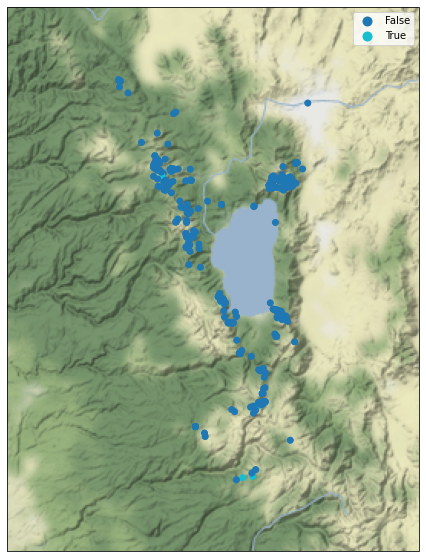

In [11]:
bnd = CSO_gdf.geometry.bounds
stamen_terrain = cimgt.Stamen('terrain-background')
dx, dy = 0.4, 0.2

fig, ax = plt.subplots(
    figsize=(10, 10), subplot_kw={"projection": stamen_terrain.crs}
)
ax.set_extent([bnd.minx.min() - dx, bnd.maxx.max() + dx, bnd.miny.min() - dy, bnd.maxy.max() + dy])

ax.add_image(stamen_terrain, 8)
CSO_gdf.plot(ax=ax, column='flags',  categorical=True, legend=True, transform=ccrs.PlateCarree());
# Doesn't look like we actually need our CSO_bad Geodataframe. We'll keep it just in case.

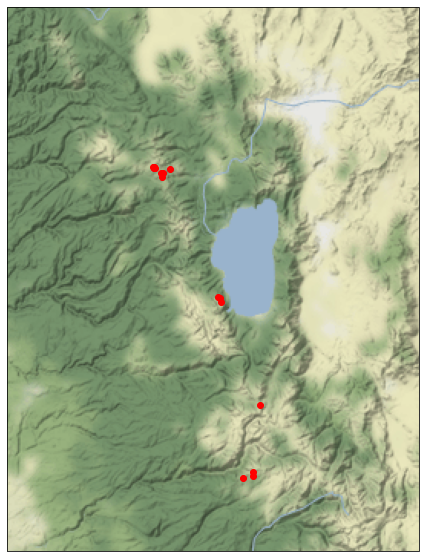

In [12]:
bnd = CSO_gdf.geometry.bounds
stamen_terrain = cimgt.Stamen('terrain-background')
dx, dy = 0.4, 0.2

fig, ax = plt.subplots(
    figsize=(10, 10), subplot_kw={"projection": stamen_terrain.crs}
)
ax.set_extent([bnd.minx.min() - dx, bnd.maxx.max() + dx, bnd.miny.min() - dy, bnd.maxy.max() + dy])

ax.add_image(stamen_terrain, 8)
CSO_flagged.plot(ax=ax, categorical=True, color='red', legend=True, transform=ccrs.PlateCarree());

Worth noting that maybe Folium could be more useful for looking at and comparing erroneous data

# We can also compute some useful statistics from our "good" Dataframe
Using these statistics we can run some confidence tests and start trimming obvious outliers.

This is would all need to be compared with measurements such as SNOTEL soon but otherwise seems like a valid next step

Maybe look into some good "R" type packages for these comparisons. Hypothesis and t-tests, etc...

In [13]:
new_mean = CSO_new['depth'].mean()
new_mean

161.9139497231664

In [14]:
old_mean = CSO_gdf['depth'].mean()
old_mean

155.31314122126275

We can see that the elimination has already removed some non-useful points from the data! It's up to use to decide if these are points that are still statistically significant or not.

# 0-Value exploration

Look into `CSO_gdf` and `CSO_flagged` to see if there are any trends among the 0-values.

In [15]:
# First we want to pull what our zero values are for this current region
CSO_flagged

,id,author,depth,source,timestamp,elevation,geometry,flags
7,Z95qZpSQ,Michael McCarthy,0.0,SnowPilot,2017-01-17 02:03:42+00:00,2441.649414,POINT (-120.01186 38.48720),True
13,RCvcmg6A,Steve Reynaud,0.0,SnowPilot,2017-01-25 21:53:45+00:00,2637.030518,POINT (-120.12468 38.97563),True
32,9IB+e8Cr,Brandon Schwartz,0.0,SnowPilot,2017-02-13 01:55:16+00:00,2256.924805,POINT (-120.04731 38.48369),True
33,gQLOtG8l,Brandon Schwartz,0.0,SnowPilot,2017-02-14 00:06:30+00:00,2552.545166,POINT (-120.01146 38.49844),True
34,uGZnzVXZ,Brandon Schwartz,0.0,SnowPilot,2017-02-15 22:26:48+00:00,2426.161377,POINT (-120.13632 38.99072),True
42,0y9qanTS,Milan Korsos,0.0,SnowPilot,2017-02-24 02:32:26+00:00,2253.379639,POINT (-120.33353 39.33458),True
44,LXz2Z1iL,Nick Jezienicki,0.0,SnowPilot,2017-02-24 05:14:07+00:00,2302.860596,POINT (-120.33946 39.33592),True
46,ibmPe+iv,Ivan McGurk,0.0,SnowPilot,2017-02-25 01:21:53+00:00,2405.705322,POINT (-120.36498 39.34933),True
47,huHTvcIh,Devin Triantos,0.0,SnowPilot,2017-02-25 02:26:15+00:00,2427.442383,POINT (-120.36673 39.35102),True
48,Hitvic4X,Nick Jezienicki,0.0,SnowPilot,2017-02-25 04:18:16+00:00,2411.693604,POINT (-120.36495 39.34977),True


In [16]:
CSO_flagged[['author','depth','source']].groupby(['author','source']).agg(['count','min','max'])

depth          
                           count  min  max
author           source                   
Brandon Schwartz SnowPilot     3  0.0  0.0
David Reichel    SnowPilot     1  0.0  0.0
Devin Triantos   SnowPilot     1  0.0  0.0
Erin Laine       SnowPilot     1  0.0  0.0
Ivan McGurk      SnowPilot     1  0.0  0.0
Kevin Mecham     SnowPilot     1  0.0  0.0
Michael McCarthy SnowPilot     1  0.0  0.0
Mike Tracey      SnowPilot     3  0.0  0.0
Milan Korsos     SnowPilot     2  0.0  0.0
Nick Jezienicki  SnowPilot     2  0.0  0.0
Steve Reynaud    SnowPilot     1  0.0  0.0

In [17]:
CSO_gdf[['author','depth','source']].groupby(['author','source']).agg(['count'])

,,depth
,,count
author,source,
Aaron Liimatainen,SnowPilot,2
Alex Rogers,MountainHub,3
Alexander Wong,MountainHub,3
Andrew Pierce,SnowPilot,10
Andrew Sullivan,SnowPilot,1
...,...,...
Tim Mincey,SnowPilot,3
Travis Feist,SnowPilot,9


It appears likes only SnowPilot observations have 0-values. Could be important information? Might need to look over a differet region to figure out if this is simply a conincidence.

# Explore an alternate Domain for 0-value exploration

We'll be using `CSO_UT` which is the gdf created from the `UT` domain

In [18]:
CSO_UT = gpd.read_file('CSO_UT')
CSO_UT['timestamp'] = pd.to_datetime(CSO_UT.timestamp)
CSO_UT['flags'] = False
CSO_UT_range = CSO_UT
CSO_UT

,id,author,depth,source,timestamp,elevation,geometry,flags
0,rFnd/WeF,Dylan Ring,280.0,MountainHub,2017-01-02 23:43:42+00:00,3042.304932,POINT (-111.67815 40.54146),False
1,TuISIHUJ,Justin Lozier,280.0,SnowPilot,2017-01-05 23:15:22+00:00,2862.723389,POINT (-111.62996 40.55062),False
2,QRYS9CgI,Louis Arevalo,138.0,MountainHub,2017-01-07 03:30:39+00:00,3091.865479,POINT (-111.60562 40.58721),False
3,HhNB4CeN,Louis Arevalo,158.0,MountainHub,2017-01-11 23:58:35+00:00,3114.426270,POINT (-111.60382 40.58485),False
4,IUBdQwMv,mark saurer,105.0,SnowPilot,2017-01-13 01:57:59+00:00,2976.603271,POINT (-111.64630 40.59965),False
...,...,...,...,...,...,...,...,...
210,cxIaicYR,Brett Korpela,105.0,SnowPilot,2018-02-26 23:13:52+00:00,3005.534668,POINT (-111.63964 40.59823),False
211,QiYAPiap,Greg Dollhausen,90.0,SnowPilot,2018-03-02 02:05:42+00:00,2351.443115,POINT (-111.67482 40.65006),False
212,gGWMZPFE,Evelyn Lees,140.0,SnowPilot,2018-03-03 04:43:28+00:00,3103.799805,POINT (-111.66929 40.54746),False
213,QV0uQ1OW,Andrew Paradis,130.0,SnowPilot,2018-03-04 00:04:51+00:00,2801.658936,POINT (-111.60389 40.67049),False


In [19]:
# We are only really concerened with the the 0-values for snow depth
CSO_UT.loc[CSO_UT['depth'] <= MIN_DEPTH, 'flags'] = True
CSO_UT.loc[CSO_UT['flags'] == True]

,id,author,depth,source,timestamp,elevation,geometry,flags
138,XEW0M8PV,Josh Beckner,0.0,SnowPilot,2017-12-29 22:33:30+00:00,2917.953369,POINT (-111.60792 40.58642),True
196,FclFFr1T,steven clark,0.0,SnowPilot,2018-02-23 19:08:21.775000+00:00,2672.606689,POINT (-111.63740 40.64172),True


In [20]:
CSO_UT_flagged = (CSO_UT.loc[CSO_UT['flags'] == True])

In [21]:
CSO_UT_flagged[['author','depth','source']].groupby(['author','source']).agg(['count','min','max'])

depth          
                       count  min  max
author       source                   
Josh Beckner SnowPilot     1  0.0  0.0
steven clark SnowPilot     1  0.0  0.0

Many fewer 0-values, which is somewhat expected however we still see that they only come from `SnowPilot`. Could be interesting

when it comes to creating our descripitive statistics.

In [22]:
CSO_new_UT = (CSO_UT.loc[CSO_UT['flags'] == False])
new_mean_UT = CSO_new_UT['depth'].mean()
old_mean_UT = CSO_UT['depth'].mean()

In [23]:
new_mean_UT

133.8441314518172

In [24]:
old_mean_UT

132.5990697638933

In the end, depending on how many 0-values are actually present, the difference may not even be statistically significant.

Still worth exploring more in a group discussion.

# Construct Histograms of the data to look into how it is distributed

Using pandas and by extension gepandas, we can construct histograms of many of our dataframs

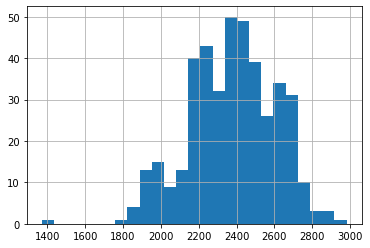

In [31]:
histogram_gdf = CSO_gdf['elevation'].hist(bins = 25)

Need to look into cleared implementaion but this seems like the right path

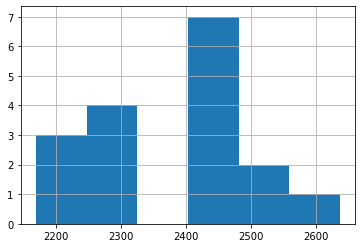

In [26]:
histogram_flagged = CSO_flagged['elevation'].hist(bins = 6)

# Start eliminating extremely low depth observations

This is to hopefully clear out inconsistent or even erroneous data. The range for which values are flagged is still up in the air.

In [27]:
range_val = 10
CSO_CA_range.loc[CSO_CA_range['depth'] <= range_val, 'flags'] = True
CSO_CA_range.loc[CSO_CA_range['depth'] == MIN_DEPTH, 'flags'] = False
CSO_CA_flag = (CSO_CA_range.loc[CSO_CA_range['flags'] == True])
CSO_CA_flag

,id,author,depth,source,timestamp,elevation,geometry,flags
71,F9NIBtP3,Kerry McClay,2.0,MountainHub,2017-11-10 20:55:00.417000+00:00,2152.003418,POINT (-120.35353 39.31810),True


In [28]:
CSO_UT_range.loc[CSO_UT_range['depth'] <= range_val, 'flags'] = True
CSO_UT_range.loc[CSO_UT_range['depth'] == MIN_DEPTH, 'flags'] = False
CSO_UT_flag = (CSO_UT_range.loc[CSO_UT_range['flags'] == True])
CSO_UT_flag

,id,author,depth,source,timestamp,elevation,geometry,flags


We may need to adjust the range however it seems as though not many values fail this check

# 